In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

# Load Data

In [3]:
dataset = pd.read_csv('creditcard.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dataset=dataset.sample(frac=1)

In [7]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175061e-15,3.380234e-16,-1.399395e-15,2.093754e-15,1.006311e-15,1.495795e-15,-5.640543e-16,1.146620e-16,-2.413166e-15,...,1.609659e-16,-3.509715e-16,2.637245e-16,4.472542e-15,5.147566e-16,1.685452e-15,-3.660527e-16,-1.225831e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Check Missing Values

In [8]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Standardized

In [9]:
Time_mean=dataset['Time'].mean(axis=0)
Time_std=dataset['Time'].std(axis=0)
dataset['Time']-=Time_mean
dataset['Time']/=Time_std

In [10]:
Amount_mean=dataset['Amount'].mean(axis=0)
Amount_std=dataset['Amount'].std(axis=0)
dataset['Amount']-=Amount_mean
dataset['Amount']/=Amount_std

In [11]:
dataset['Time']

267315    1.429981
139762   -0.241636
187435    0.688975
43817    -1.119287
190813    0.719719
            ...   
10807    -1.608609
202254    0.830189
226403    1.048644
73074    -0.839154
130574   -0.324941
Name: Time, Length: 284807, dtype: float64

In [12]:
dataset['Amount']

267315   -0.344833
139762    0.566929
187435   -0.337276
43817     0.122543
190813   -0.049375
            ...   
10807     0.254999
202254   -0.273267
226403    0.625381
73074    -0.282143
130574   -0.305212
Name: Amount, Length: 284807, dtype: float64

In [13]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - 0.50)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.30/(0.30 + 0.20)) 
print(x_train.shape, x_val.shape, x_test.shape)

(142403, 30) (56961, 30) (85443, 30)


# Model

In [51]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, kernel_regularizer=l2(0.01), activation='relu'))
tf.keras.layers.Dropout(0.5)
model.add(tf.keras.layers.Dense(8, kernel_regularizer=l2(0.01), activation='relu'))
model.add(tf.keras.layers.Dense(6, kernel_regularizer=l2(0.01), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# Compilation Step

In [52]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])


# Train the Model

In [53]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5
4451/4451 [==============================] - 4s 787us/step - loss: 0.0599 - accuracy: 0.9979 - val_loss: 0.0156 - val_accuracy: 0.9979
Epoch 2/5
4451/4451 [==============================] - 3s 745us/step - loss: 0.0127 - accuracy: 0.9984 - val_loss: 0.0149 - val_accuracy: 0.9979
Epoch 3/5
4451/4451 [==============================] - 3s 751us/step - loss: 0.0124 - accuracy: 0.9984 - val_loss: 0.0146 - val_accuracy: 0.9979
Epoch 4/5
4451/4451 [==============================] - 3s 746us/step - loss: 0.0121 - accuracy: 0.9984 - val_loss: 0.0141 - val_accuracy: 0.9979
Epoch 5/5
4451/4451 [==============================] - 3s 762us/step - loss: 0.0117 - accuracy: 0.9984 - val_loss: 0.0137 - val_accuracy: 0.9979


In [54]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 6)

print('Training Loss: ' + str(train_loss[-1]))
print('*'*20)
print('Validation Loss' + str(val_loss[-1]))

Training Loss: 0.011659210547804832
********************
Validation Loss0.013654801994562149


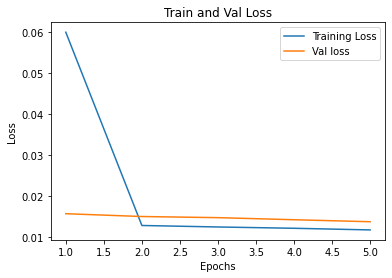

In [55]:
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Train and Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
accuracy = history.history['accuracy']
val_accu= history.history['val_accuracy']

print('accuracy: ' + str(accuracy[-1]))
print('*'*20)
print('Validation accu:' + str(val_accu[-1]))



accuracy: 0.9983778595924377
********************
Validation accu:0.9979283809661865


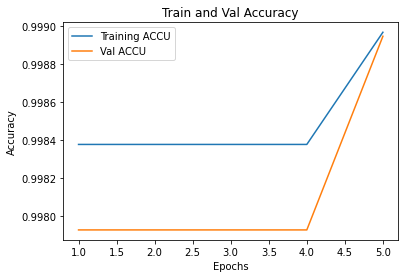

In [57]:
plt.plot(epochs, mae_train, label='Training ACCU')
plt.plot(epochs, mae_val, label='Val ACCU')
plt.title('Train and Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluation 

In [58]:
model.evaluate(x_test,y_test)

2671/2671 [==============================] - 1s 445us/step - loss: 0.0112 - accuracy: 0.9983


[0.011220449581742287, 0.9983263611793518]

# Prediction

In [59]:
predictions=model.predict(x_test)
predictions[2829]

array([0.00061539], dtype=float32)

In [60]:
y_test[2829]

0